A neural network is a computational model that mimics the process of the human brain. It involves taking input and breaking it down into layers before condensing those layers or layers of those layers into an output. Again it would be similar to the human brain when we see a deer jump in front of us: the input is the seeing the deer and then there are multiples things like our brain sending and returning signals or quickly debating what we should do between that before the output is our action, hopefully either swerving or braking in time to avoid injuries and damage.

We generally check the performance of a neural network with a loss function. Loss functions are essential to calculating and minimizng error in neural networks. They take all aspects of the model into consideration and condense them into one number which we can use as a measurement to determine how good a model is. 

In [1]:
import numpy as np
import sklearn as sk
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import pandas as pd
import requests
from io import StringIO
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import torch
import torch.nn as nn
import torch.nn.functional as F 

In [2]:
credit_df=pd.read_csv('Credit_card.csv')
label_df=pd.read_csv('Credit_card_label.csv')
credit_df['label']=label_df['label']
cor_df=credit_df.copy()
cor_df['GENDER']=cor_df['GENDER'].astype('category').cat.codes
cor_df['Car_Owner']=cor_df['Car_Owner'].astype('category').cat.codes
cor_df['Propert_Owner']=cor_df['Propert_Owner'].astype('category').cat.codes

In [3]:
cor_df['Marital_status']=cor_df['Marital_status'].map(lambda x: 1 if 'Single / not married' in x
                                                      else 2 if 'Separated' in x
                                                      else 3 if 'Widow' in x
                                                      else 4 if 'Civil marriage' in x
                                                      else 5 if 'Married' in x
                                                      else 5)

In [4]:
cor_df['Type_Income']=cor_df['Type_Income'].map(lambda x: 1 if 'Pensioner' in x
                                                else 2 if 'State servant' in x
                                                else 3 if 'Working' in x
                                                else 4 if 'Commercial associate' in x
                                                else 3)

In [5]:
cor_df['EDUCATION']=cor_df['EDUCATION'].map(lambda x: 1 if 'Lower secondary' in x
                                            else 2 if 'Secondary / secondary special' in x
                                            else 3 if 'Incomplete higher' in x
                                            else 4 if 'Higher education' in x
                                            else 5 if 'Academic degree' in x
                                            else 2 in x)

In [6]:
cor_df['Housing_type']=cor_df['Housing_type'].map(lambda x: 1 if 'With parents' in x
                                                  else 2 if 'Municipal apartment' in x
                                                  else 3 if 'Rented apartment' in x
                                                  else 4 if 'Co-op apartment' in x
                                                  else 5 if 'Office apartment' in x
                                                  else 6 if 'House / apartment' in x
                                                  else 6)

In [7]:
cor_df['Type_Occupation']=cor_df['Type_Occupation'].astype(str)
cor_df['Type_Occupation']=cor_df['Type_Occupation'].map(lambda x: 1 if 'Low-skill Laborers' in x
                                                        else 2 if 'Waiters/barmen staff' in x
                                                        else 3 if 'Cleaning staff' in x
                                                        else 4 if 'Drivers' in x
                                                        else 5 if 'Cooking staff' in x
                                                        else 6 if 'Private service staff' in x
                                                        else 7 if 'Realty agents' in x
                                                        else 8 if 'Security staff' in x
                                                        else 9 if 'Laborers' in x
                                                        else 10 if 'Sales staff' in x
                                                        else 11 if 'Secretaries' in x
                                                        else 12 if 'IT staff' in x
                                                        else 13 if 'HR staff' in x
                                                        else 14 if 'Accountants' in x
                                                        else 15 if 'Medicine staff' in x
                                                        else 16 if 'High skill tech staff' in x
                                                        else 17 if 'Core staff' in x
                                                        else 18 if 'Managers' in x
                                                        else 9)

In [8]:
cor_df['Annual_income']=cor_df['Annual_income'].fillna(135000)
cor_df['Birthday_count']=cor_df['Birthday_count'].fillna(-16040.342070773264)
cor_df.drop('Mobile_phone', axis=1, inplace=True)
def make_positive(column: pd.Series) -> pd.Series:
    positive_column = column.abs()
    return positive_column
cor_df['Birthday_count'] = make_positive(cor_df['Birthday_count'])
def replace_outliers(column: pd.Series, outlier_value: int) -> pd.Series:
    median_value = column.median()
    column = column.replace(outlier_value, median_value)
    return column
cor_df['Employed_days'] = replace_outliers(cor_df['Employed_days'], 365243)
cor_df['Employed_days'] = make_positive(cor_df['Employed_days'])
cor_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000.0,1,4,5,6,18772.000000,1565,0,0,0,9,2,1
1,5009744,0,1,0,0,315000.0,4,4,5,6,13557.000000,586,1,1,0,9,2,1
2,5009746,0,1,0,0,315000.0,4,4,5,6,16040.342071,586,1,1,0,9,2,1
3,5009749,0,1,0,0,135000.0,4,4,5,6,13557.000000,586,1,1,0,9,2,1
4,5009752,0,1,0,0,315000.0,4,4,5,6,13557.000000,586,1,1,0,9,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,135000.0,4,4,5,6,11957.000000,2182,0,0,0,18,2,0
1544,5023655,0,0,0,0,225000.0,4,3,1,6,10229.000000,1209,0,0,0,14,1,0
1545,5115992,1,1,1,2,180000.0,3,4,5,6,13174.000000,2477,0,0,0,18,4,0
1546,5118219,1,1,0,0,270000.0,3,2,4,6,15292.000000,645,1,1,0,4,2,0


In [9]:
cor_df['Ind_ID'].max()

5150412

In [10]:
# new changes
# while I dont expect it to do much, an imporvement I made is standardizing the id column by basing them on the minimum
cor_df['Ind_ID'] = cor_df['Ind_ID'] - cor_df['Ind_ID'].min()
#similarly, I decided to do the same for birthday count(even though i'm still not too sure what that column actually measures.
cor_df['Birthday_count'] = cor_df['Birthday_count'] - cor_df['Birthday_count'].min()
#and finally I decided to do it for annual income as well. this change I could actually see being somewhat impactful
cor_df['Annual_income'] = cor_df['Annual_income'] - cor_df['Annual_income'].min()

In [11]:
cor_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,0,1,1,1,0,146250.0,1,4,5,6,11067.000000,1565,0,0,0,9,2,1
1,917,0,1,0,0,281250.0,4,4,5,6,5852.000000,586,1,1,0,9,2,1
2,919,0,1,0,0,281250.0,4,4,5,6,8335.342071,586,1,1,0,9,2,1
3,922,0,1,0,0,101250.0,4,4,5,6,5852.000000,586,1,1,0,9,2,1
4,925,0,1,0,0,281250.0,4,4,5,6,5852.000000,586,1,1,0,9,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,19818,0,0,1,0,101250.0,4,4,5,6,4252.000000,2182,0,0,0,18,2,0
1544,14828,0,0,0,0,191250.0,4,3,1,6,2524.000000,1209,0,0,0,14,1,0
1545,107165,1,1,1,2,146250.0,3,4,5,6,5469.000000,2477,0,0,0,18,4,0
1546,109392,1,1,0,0,236250.0,3,2,4,6,7587.000000,645,1,1,0,4,2,0


In [12]:
X = cor_df.drop('label', axis=1).values
y = cor_df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=32,
                                                    stratify=y)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

print(X_train)

tensor([[1.3366e+05, 1.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 1.7000e+01,
         4.0000e+00],
        [8.2965e+04, 1.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 1.0000e+00,
         3.0000e+00],
        [1.2711e+05, 0.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 1.0000e+01,
         4.0000e+00],
        ...,
        [5.3268e+04, 1.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 1.6000e+01,
         1.0000e+00],
        [5.7735e+04, 0.0000e+00, 0.0000e+00,  ..., 1.0000e+00, 1.0000e+01,
         2.0000e+00],
        [4.5587e+04, 1.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 1.8000e+01,
         2.0000e+00]])


In [13]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=17,hidden1=20,hidden2=20,out_features=2):
        super().__init__() 
        self.layer_1_connection = nn.Linear(input_features,hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [14]:
torch.manual_seed(32)
ann = ANN_Model()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ann.parameters(), lr=0.01)
final_loss=[]
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss}')

    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step()

Epoch number: 1 with loss: 707.0682983398438
Epoch number: 11 with loss: 260.87841796875
Epoch number: 21 with loss: 121.78612518310547
Epoch number: 31 with loss: 83.2296142578125
Epoch number: 41 with loss: 75.35823822021484
Epoch number: 51 with loss: 28.799686431884766
Epoch number: 61 with loss: 57.827362060546875
Epoch number: 71 with loss: 13.925835609436035
Epoch number: 81 with loss: 10.932641983032227
Epoch number: 91 with loss: 12.424522399902344
Epoch number: 101 with loss: 16.965045928955078
Epoch number: 111 with loss: 28.351655960083008
Epoch number: 121 with loss: 12.646116256713867
Epoch number: 131 with loss: 3.618405818939209
Epoch number: 141 with loss: 3.0921130180358887
Epoch number: 151 with loss: 9.327598571777344
Epoch number: 161 with loss: 4.214353561401367
Epoch number: 171 with loss: 8.292620658874512
Epoch number: 181 with loss: 1.9071886539459229
Epoch number: 191 with loss: 3.020676851272583
Epoch number: 201 with loss: 5.819252014160156
Epoch number: 21

In [15]:
y_pred = []

with torch.no_grad(): 
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax()) 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       412
           1       1.00      0.02      0.04        53

    accuracy                           0.89       465
   macro avg       0.94      0.51      0.49       465
weighted avg       0.90      0.89      0.84       465



ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (467).

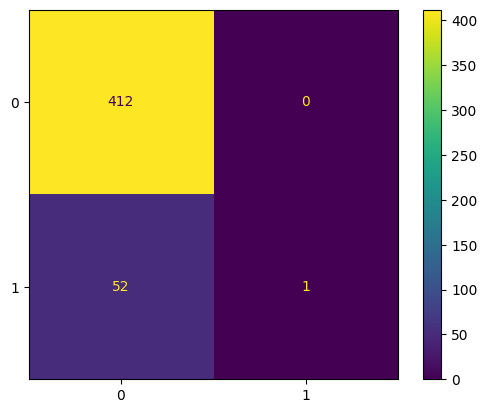

In [16]:
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [17]:
cor_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,0,1,1,1,0,146250.0,1,4,5,6,11067.000000,1565,0,0,0,9,2,1
1,917,0,1,0,0,281250.0,4,4,5,6,5852.000000,586,1,1,0,9,2,1
2,919,0,1,0,0,281250.0,4,4,5,6,8335.342071,586,1,1,0,9,2,1
3,922,0,1,0,0,101250.0,4,4,5,6,5852.000000,586,1,1,0,9,2,1
4,925,0,1,0,0,281250.0,4,4,5,6,5852.000000,586,1,1,0,9,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,19818,0,0,1,0,101250.0,4,4,5,6,4252.000000,2182,0,0,0,18,2,0
1544,14828,0,0,0,0,191250.0,4,3,1,6,2524.000000,1209,0,0,0,14,1,0
1545,107165,1,1,1,2,146250.0,3,4,5,6,5469.000000,2477,0,0,0,18,4,0
1546,109392,1,1,0,0,236250.0,3,2,4,6,7587.000000,645,1,1,0,4,2,0


In [18]:
(412+1)/(412+52+1+0)

0.8881720430107527

As we can see, we get a pretty good accuracy score when we use the confusion matrix that we get when creating a neurall network. In fact, the neural network I created just barely edges out logistic regression by about .002. However, this could be due to the fact that I slightly changed some of the columns. And when we look at the SVM that I originally used on this dataset, we see the neural network actually performs very slightly worse, by about .02 or 2 percent. Either way, we see very similar results between the neural network and some of the other methods proabbly due to the simplicity of the outcome(being binary) and also the fact that the outcomes are very skewed with a ratio of nearly 8 zeroes to every 1 one.

In [19]:
cor_df['label'].value_counts()

label
0    1373
1     175
Name: count, dtype: int64

In [20]:
1373/175

7.845714285714286